<a href="https://colab.research.google.com/github/Gweneal3/Machine_Learning_YT/blob/master/Calories%20Burnt%20Prediction/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

Data Collection and Preprocessing

In [27]:
calories = pd.read_csv("./calories.csv")

In [28]:
print(calories.shape)

(15000, 2)


In [29]:
print(calories.head())

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


In [30]:
exercise_data = pd.read_csv("./exercise.csv")

In [31]:
print(exercise_data.shape)

(15000, 8)


In [32]:
print(exercise_data.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


Combining the 2 Dataframes

In [33]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [34]:
print(calories_data.shape)

(15000, 9)


In [35]:
print(calories_data.head())

    User_ID  Gender  Age  Height  ...  Duration  Heart_Rate  Body_Temp  Calories
0  14733363    male   68   190.0  ...      29.0       105.0       40.8     231.0
1  14861698  female   20   166.0  ...      14.0        94.0       40.3      66.0
2  11179863    male   69   179.0  ...       5.0        88.0       38.7      26.0
3  16180408  female   34   179.0  ...      13.0       100.0       40.5      71.0
4  17771927  female   27   154.0  ...      10.0        81.0       39.8      35.0

[5 rows x 9 columns]


In [36]:
print(calories_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [37]:
print(calories_data.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [38]:
print(calories_data.describe())

            User_ID           Age  ...     Body_Temp      Calories
count  1.500000e+04  15000.000000  ...  15000.000000  15000.000000
mean   1.497736e+07     42.789800  ...     40.025453     89.539533
std    2.872851e+06     16.980264  ...      0.779230     62.456978
min    1.000116e+07     20.000000  ...     37.100000      1.000000
25%    1.247419e+07     28.000000  ...     39.600000     35.000000
50%    1.499728e+07     39.000000  ...     40.200000     79.000000
75%    1.744928e+07     56.000000  ...     40.600000    138.000000
max    1.999965e+07     79.000000  ...     41.500000    314.000000

[8 rows x 8 columns]


Data Visualisation

In [39]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

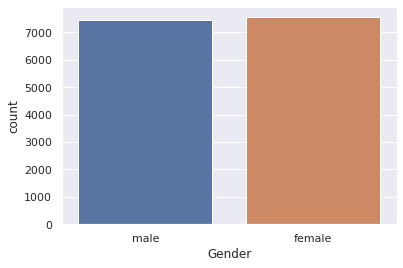

In [40]:
sns.countplot(x='Gender', data=calories_data)

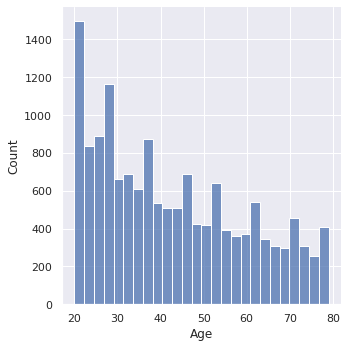

In [41]:
# distribution of age
sns.displot(calories_data.Age)

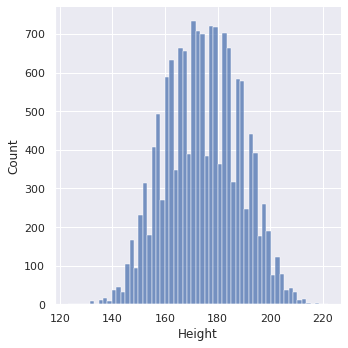

In [42]:
# distribution of Height
sns.displot(calories_data.Height)

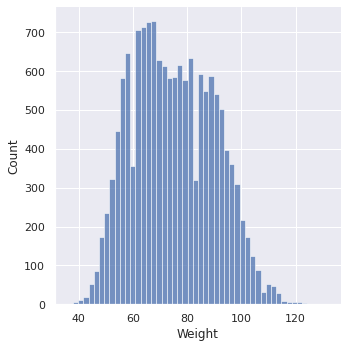

In [43]:
# distribution of Weight
sns.displot(calories_data.Weight)

Correlation

In [44]:
correlation = calories_data.corr()

<Axes: >

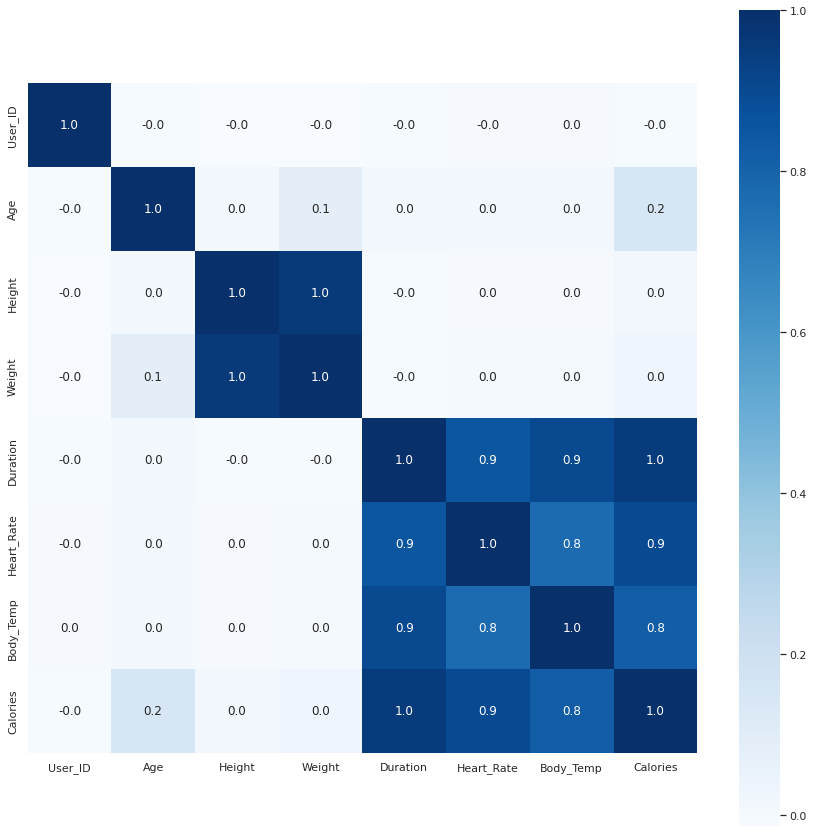

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='Blues', cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12})

Encoding

In [48]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [49]:
print(calories_data.head())

    User_ID  Gender  Age  Height  ...  Duration  Heart_Rate  Body_Temp  Calories
0  14733363       0   68   190.0  ...      29.0       105.0       40.8     231.0
1  14861698       1   20   166.0  ...      14.0        94.0       40.3      66.0
2  11179863       0   69   179.0  ...       5.0        88.0       38.7      26.0
3  16180408       1   34   179.0  ...      13.0       100.0       40.5      71.0
4  17771927       1   27   154.0  ...      10.0        81.0       39.8      35.0

[5 rows x 9 columns]


Split Feature and Target

In [51]:
X = calories_data.drop(['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

Train Test Split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Train Model

In [55]:
model = XGBRegressor()

In [58]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Model Evaluation

In [59]:
X_test_prediction = model.predict(X_test)

In [60]:
# r2 score
error_score_test =  metrics.r2_score(Y_test, X_test_prediction)

In [61]:
print(error_score_test)

0.9988455491362879


In [62]:
# mean absolute error
mean_absolute_error = metrics.mean_absolute_error(Y_test, X_test_prediction)

In [63]:
print(mean_absolute_error)

1.4807048829992613


Compare Prediction and Actual

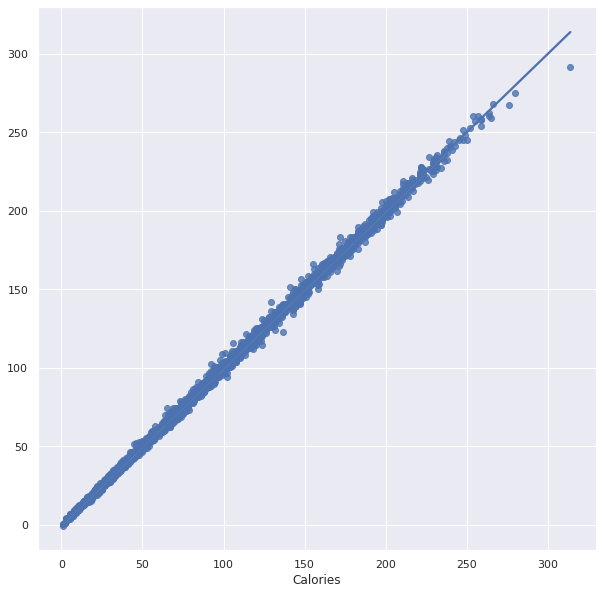

In [73]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test, y=X_test_prediction);